#About Dataset
###A Wearable Exam Stress Dataset
The data contains electrodermal activity, heart rate, blood volume pulse, skin surface temperature, inter beat interval and accelerometer data recorded during three exam sessions (midterm 1, midterm 2 and final) as well as their corresponding grades. The Data file contains folders of 10 student, each participants named as S1, S2, etc.

Link: https://physionet.org/content/wearable-exam-stress/1.0.0/

In [ ]:
#importing libraries
import pandas as pd #using pandas instead of pyspark as volume is not much
import numpy as np

###Data Transformation & Cleaning
We have data of 10 students, Each student has given 3 exams i.e. midterm1, midterm2 & final.

For each exam we have different sensor data like temperations of a student, heart rate during exam, EDA, ACC, etc.

so in total we have 10 (students) * 3 (exams) * n (parameters) = 30n data files

In [ ]:

#Extracting data from each file and creating one dataset for each student
#I am considering 4 parameter for now

dict_of_df={}
student=['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']
exams=['Midterm 1','Midterm 2','Final']

for stud in student:

  # Four parameters
  TEMP = pd.DataFrame(columns = ['ExamType','temp'])
  HR = pd.DataFrame(columns = ['hr'])
  ACC = pd.DataFrame(columns = ['xaxis','yaxis','zaxis'])
  EDA = pd.DataFrame(columns = ['eda'])

  for exam in exams:
    if(exam=='Final'):
      temp=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Data/{stud}/Final/TEMP.csv',names=['temp'])
      #Normalizing sampling rate
      #Downsampling as frequency of capturing data frequency for each sensor is different
      temp=temp.iloc[2::8, :]
      hr=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Data/{stud}/Final/HR.csv',names=['hr'])
      #Downsampling as frequency of capturing data for frequency each sensor is different
      hr=hr.iloc[2::2, :]
      acc=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Data/{stud}/Final/ACC.csv',names=['xaxis','yaxis','zaxis'])
      #Downsampling as frequency of capturing data for frequency each sensor is different
      acc=acc.iloc[2::64, :]
      eda=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Data/{stud}/Final/EDA.csv',names=['eda'])
      #Downsampling as frequency of capturing data for frequency each sensor is different
      eda=eda.iloc[2::8, :]
    else:
      temp=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Data/{stud}/{exam}/TEMP.csv',names=['temp'])
      #Downsampling as frequency of capturing data for frequency each sensor is different
      temp=temp.iloc[2::4, :]
      hr=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Data/{stud}/{exam}/HR.csv',names=['hr'])
      #Downsampling as frequency of capturing data for frequency each sensor is different
      hr=hr.iloc[2::1, :]
      acc=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Data/{stud}/{exam}/ACC.csv',names=['xaxis','yaxis','zaxis'])
      #Downsampling as frequency of capturing data for frequency each sensor is different
      acc=acc.iloc[2::32, :]
      eda=pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/Data/{stud}/{exam}/EDA.csv',names=['eda'])
      #Downsampling as frequency of capturing data for frequency each sensor is different
      eda=eda.iloc[2::4, :]

    #extracting same number of records for all parameters and adding Exam Type as a new column
    temp=temp.iloc[:11000]
    temp['ExamType']=exam
    hr=hr.iloc[:11000]
    acc=acc.iloc[:11000]
    eda=eda.iloc[:11000]

    TEMP = pd.concat([TEMP,temp],ignore_index=True)
    HR = pd.concat([HR,hr],ignore_index=True)
    ACC = pd.concat([ACC,acc],ignore_index=True)
    EDA = pd.concat([EDA,eda],ignore_index=True)

  #Finally creating data frame for each student
  df=pd.DataFrame(columns = ['TEMP','HR','ACC','EDA', 'ExamType'])
  df = pd.concat([TEMP,HR,ACC,EDA],axis=1)

  #creating dictionary for analysis
  df_name='df'+stud
  exec(f'{df_name} = df.copy()')

  dict_of_df[df_name]=df.copy()



In [ ]:
dfS1.head()

,ExamType,temp,hr,xaxis,yaxis,zaxis,eda
0,Midterm 1,22.51,84.00,-3.0,-62.0,12.0,0.000000
1,Midterm 1,22.51,85.00,-3.0,-62.0,12.0,0.023065
2,Midterm 1,22.51,86.00,-3.0,-62.0,12.0,0.023065
3,Midterm 1,22.51,86.75,-3.0,-62.0,12.0,0.023065
4,Midterm 1,22.49,87.40,-3.0,-62.0,12.0,0.023065


In [ ]:
dfS1.describe()

,temp,hr,xaxis,yaxis,zaxis,eda
count,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000,33000.000000
mean,26.661447,106.013269,-21.829455,4.521848,10.128818,0.185488
std,3.872240,22.797051,30.401409,34.167342,38.959911,0.327500
min,16.250000,57.000000,-128.000000,-128.000000,-128.000000,0.000000
25%,23.150000,88.170000,-44.000000,-8.000000,-12.000000,0.024347
50%,27.750000,106.080000,-26.000000,1.000000,10.000000,0.144799
75%,29.830000,118.870000,-1.000000,14.000000,50.000000,0.197325
max,32.730000,194.470000,108.000000,127.000000,127.000000,2.784353


In [ ]:
#removing null values if any
for df_name,df in dict_of_df.items():
  df.dropna(inplace=True)

###Data Analysis & Visualization
Tried to answer some questions like :

-What is the average temperature and heart rate of students in different exams?

-Is there a correlation between different parameters?

-How does the heart rate and temperature of students change during exams?

-How does the acceleration of students change during exams?

-what is stress level of student?

-How do the grades of students correlate with their heart rate and temperature and other parameters?

-Do more stressed individuals tend to perform worse?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-8-02f2e40f903e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.loc[df['ExamType']=='Final'].corr(), annot=True)


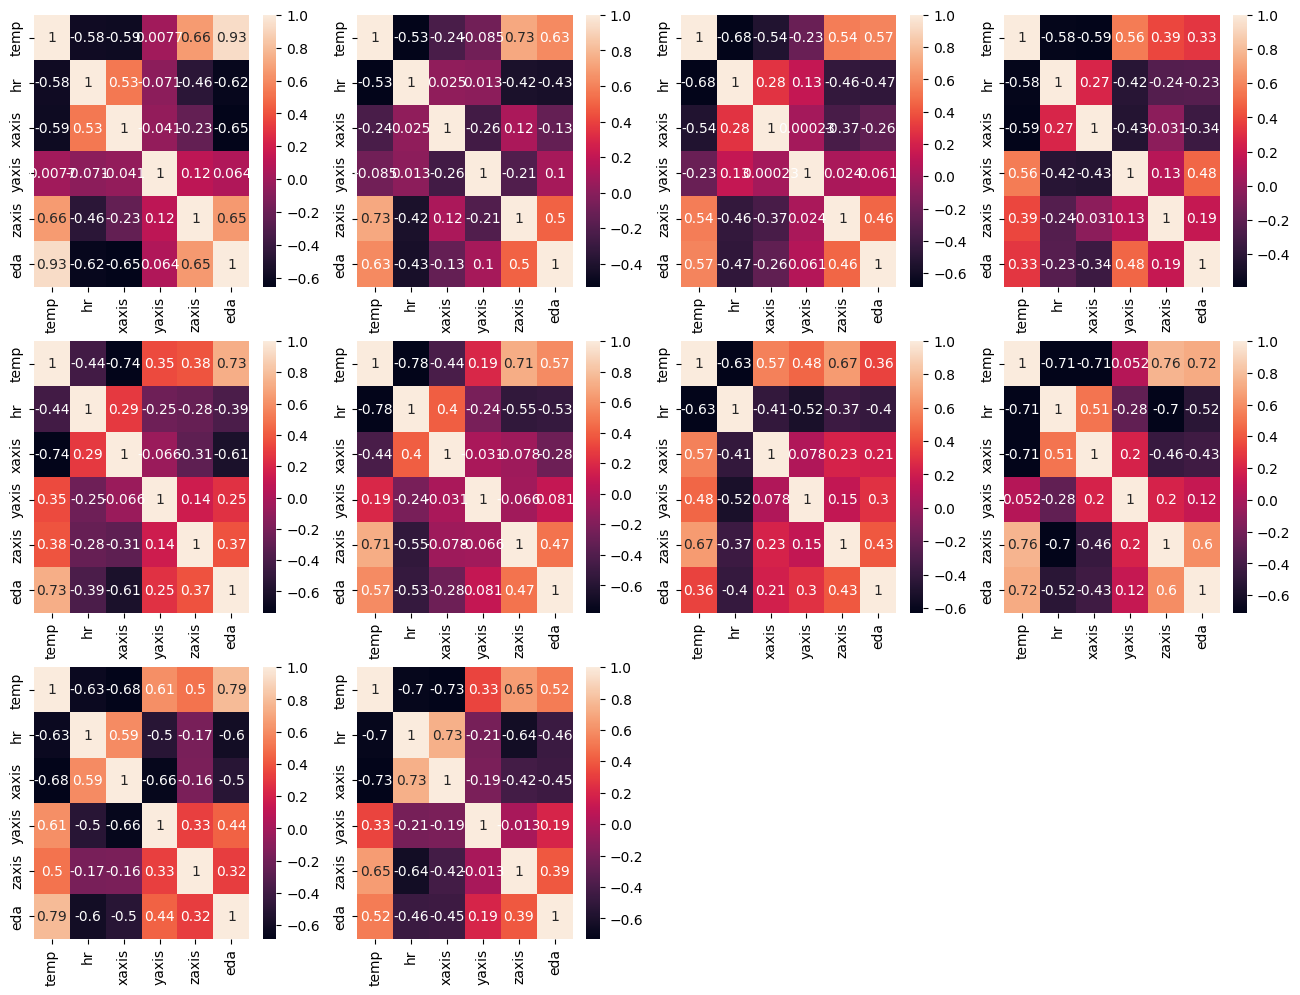

In [ ]:
#correlation between differnet parameter
plt.figure(figsize=(16, 12))
count=1

for df_name,df in dict_of_df.items():
  plt.subplot(3,4,count)
  ax = sns.heatmap(df.loc[df['ExamType']=='Final'].corr(), annot=True)
  count+=1

####Key Findings
-Parameters are highly correlated

-There is negetive correlation between temperature & heart rate

-There is positive correlation between temperature & electrodermal activity.

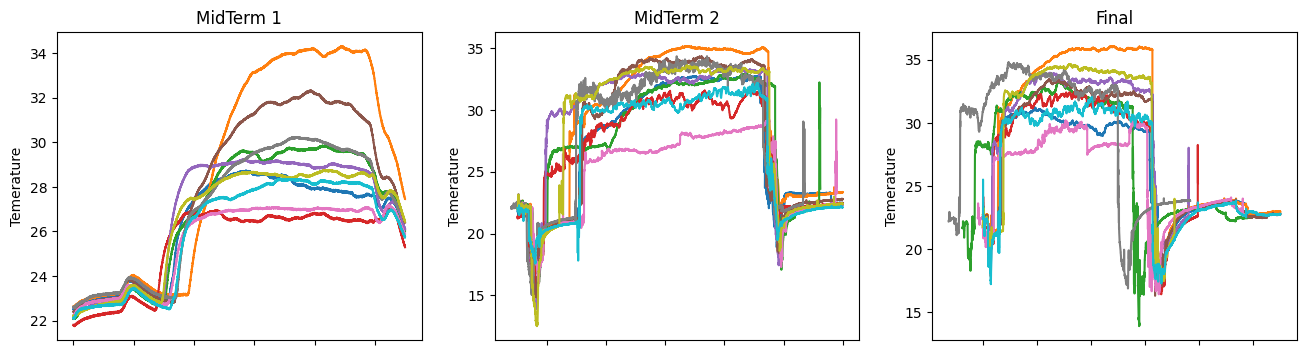

In [ ]:
#Temperature of each Student during exams
plt.figure(figsize=(16, 4))

for df_name,df in dict_of_df.items():
  plt.subplot(1,3,1)
  plt.plot(df.loc[df['ExamType']=='Midterm 1']['temp'])
  plt.title('MidTerm 1')
  plt.ylabel('Temerature')
  plt.xticks(visible=False)

for df_name,df in dict_of_df.items():
  plt.subplot(1,3,2)
  plt.plot(df.loc[df['ExamType']=='Midterm 2']['temp'])
  plt.title('MidTerm 2')
  plt.ylabel('Temerature')
  plt.xticks(visible=False)

for df_name,df in dict_of_df.items():
  plt.subplot(1,3,3)
  plt.plot(df.loc[df['ExamType']=='Final']['temp'])
  plt.title('Final')
  plt.ylabel('Temerature')
  plt.xticks(visible=False)

plt.show()


####Key findings
-We can observe relatively high Temperature of the body in between the exam timings.

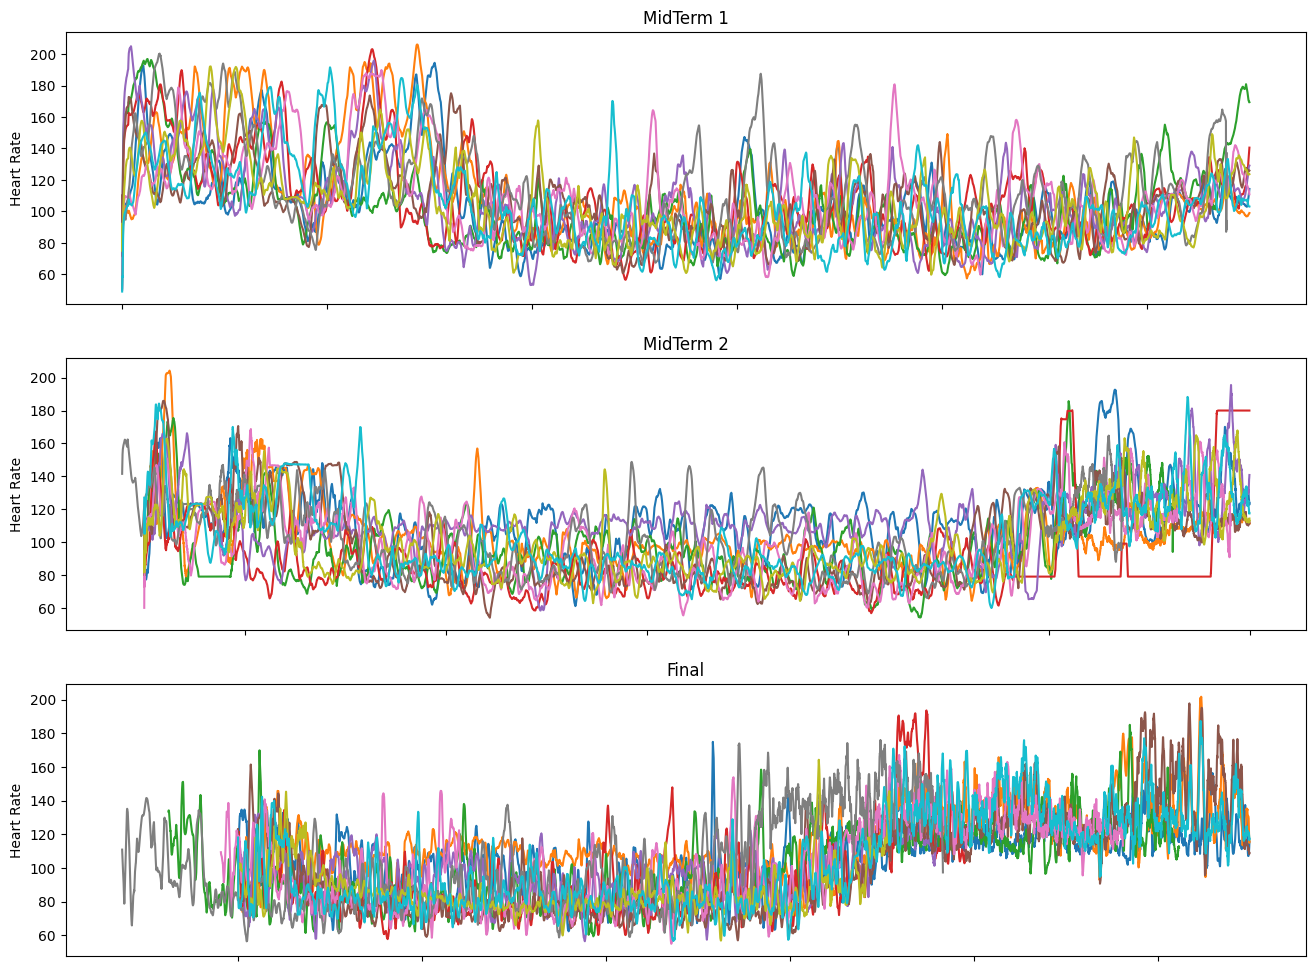

In [ ]:
#Heart Rate of each Student during exams
plt.figure(figsize=(16, 12))

for df_name,df in dict_of_df.items():
  plt.subplot(3,1,1)
  plt.plot(df.loc[df['ExamType']=='Midterm 1']['hr'])
  plt.title('MidTerm 1')
  plt.ylabel('Heart Rate')
  plt.xticks(visible=False)

for df_name,df in dict_of_df.items():
  plt.subplot(3,1,2)
  plt.plot(df.loc[df['ExamType']=='Midterm 2']['hr'])
  plt.title('MidTerm 2')
  plt.ylabel('Heart Rate')
  plt.xticks(visible=False)

for df_name,df in dict_of_df.items():
  plt.subplot(3,1,3)
  plt.plot(df.loc[df['ExamType']=='Final']['hr'])
  plt.title('Final')
  plt.ylabel('Heart Rate')
  plt.xticks(visible=False)

plt.show()

####Key Findings
-Students are nervous during starting and ending of exam

In [ ]:
#Average heart rate for each student
for df_name,df in dict_of_df.items():
  print(df_name+'::')
  print('Midterm 1:',df.loc[df['ExamType']=='Midterm 1']['hr'].mean().round(1))
  print('Midterm 2:',df.loc[df['ExamType']=='Midterm 1']['hr'].mean().round(1))
  print('Final:',df.loc[df['ExamType']=='Final']['hr'].mean().round(1))
  print('==================================')


dfS1::
Midterm 1: 102.7
Midterm 2: 102.7
Final: 104.6
dfS2::
Midterm 1: 109.2
Midterm 2: 109.2
Final: 116.1
dfS3::
Midterm 1: 102.2
Midterm 2: 102.2
Final: 100.9
dfS4::
Midterm 1: 108.1
Midterm 2: 108.1
Final: 92.7
dfS5::
Midterm 1: 106.7
Midterm 2: 106.7
Final: 95.4
dfS6::
Midterm 1: 106.9
Midterm 2: 106.9
Final: 100.9
dfS7::
Midterm 1: 109.3
Midterm 2: 109.3
Final: 101.2
dfS8::
Midterm 1: 113.7
Midterm 2: 113.7
Final: 102.1
dfS9::
Midterm 1: 104.9
Midterm 2: 104.9
Final: 86.7
dfS10::
Midterm 1: 105.4
Midterm 2: 105.4
Final: 104.2


####Key Findings
-Lesser the time (in midterm it is 1.5 hrs & in finals it is 3 hrs), more the pressure and more is the heart rate of a student

{'whiskers': [<matplotlib.lines.Line2D at 0x7ce57c1f51e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ce57c1f5720>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ce57c1f4f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7ce57c1f5c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ce57c1f5f00>],
 'means': []}

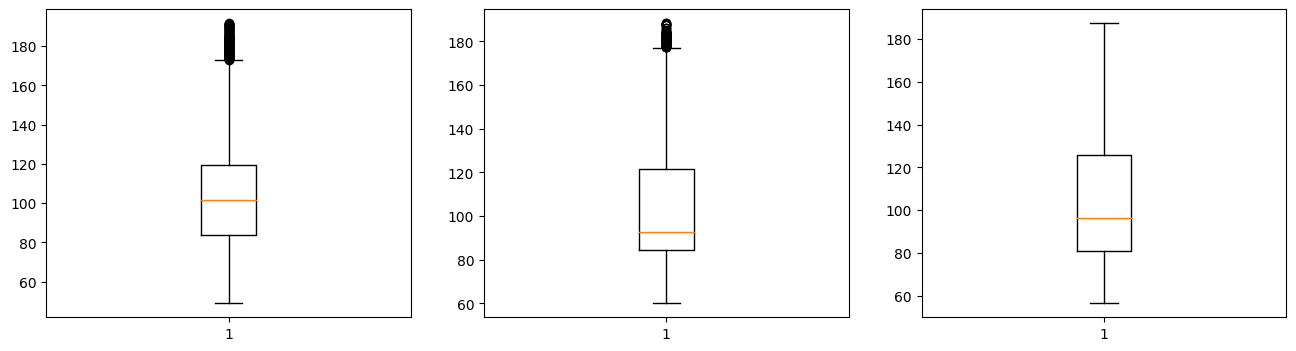

In [ ]:
#Analysing 1 student heartrate
plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
plt.boxplot(dfS10.loc[dfS10['ExamType']=='Midterm 1']['hr'])
plt.subplot(1,3,2)
plt.boxplot(dfS10.loc[dfS10['ExamType']=='Midterm 2']['hr'])
plt.subplot(1,3,3)
plt.boxplot(dfS10.loc[dfS10['ExamType']=='Final']['hr'])

(array([20000., 22000., 24000., 26000., 28000., 30000., 32000., 34000.]),
 [Text(20000.0, 0, '20000'),
  Text(22000.0, 0, '22000'),
  Text(24000.0, 0, '24000'),
  Text(26000.0, 0, '26000'),
  Text(28000.0, 0, '28000'),
  Text(30000.0, 0, '30000'),
  Text(32000.0, 0, '32000'),
  Text(34000.0, 0, '34000')])

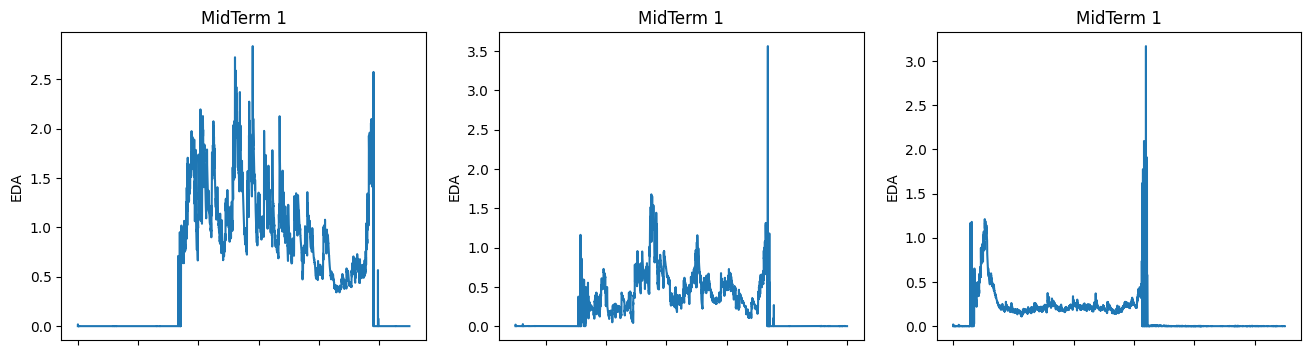

In [ ]:
#EDA of student 6
plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
plt.plot(dfS6.loc[dfS6['ExamType']=='Midterm 1']['eda'])
plt.title('MidTerm 1')
plt.ylabel('EDA')
plt.xticks(visible=False)

plt.subplot(1,3,2)
plt.plot(dfS6.loc[dfS6['ExamType']=='Midterm 2']['eda'])
plt.title('MidTerm 1')
plt.ylabel('EDA')
plt.xticks(visible=False)

plt.subplot(1,3,3)
plt.plot(dfS6.loc[dfS6['ExamType']=='Final']['eda'])
plt.title('MidTerm 1')
plt.ylabel('EDA')
plt.xticks(visible=False)

####Key findings
-On an average EDA is revolving around 0.5 to 1.5 level in midterm and around 0.0 to 1.0 in final.

-we can see some spike may be due to faulty reading.

<ipython-input-14-946e0e161593>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,count)


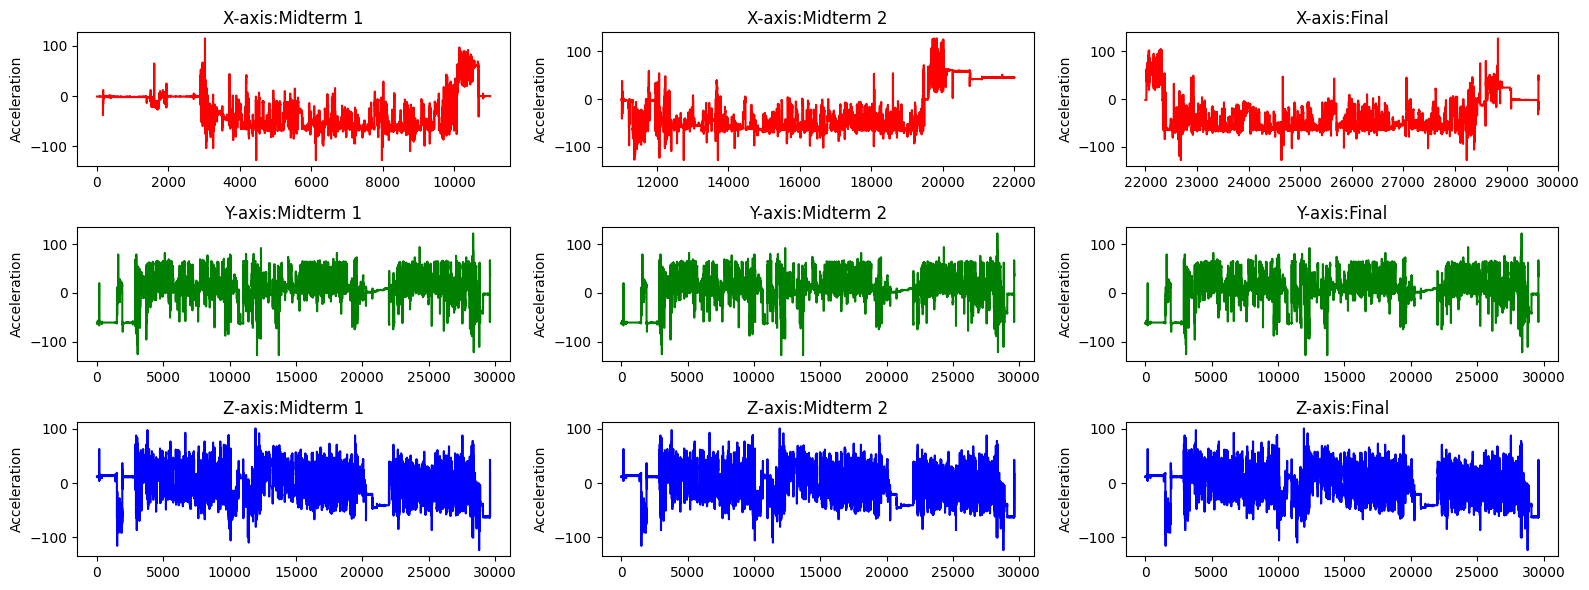

In [ ]:
#Movement of student 5 (accelerometer sensor)
plt.figure(figsize=(16, 6))
count=1
# X-axis plot
plt.title('Acceleration along X-axis')
for exam in exams:
  plt.subplot(3,3,count)
  plt.plot(dfS5[dfS5['ExamType']==exam]['xaxis'], color='r')
  plt.ylabel('Acceleration')
  plt.title('X-axis:'+exam)
  count+=1


# Y-axis plot
for exam in exams:
  plt.subplot(3,3,count)
  plt.plot(dfS5['yaxis'], color='g')
  plt.ylabel('Acceleration')
  plt.title('Y-axis:'+exam)
  count+=1


# Z-axis plot
for exam in exams:
  plt.subplot(3,3,count)
  plt.plot(dfS5['zaxis'], color='b')
  plt.ylabel('Acceleration')
  plt.title('Acceleration along Z-axis')
  plt.title('Z-axis:'+exam)
  count+=1


# Adjust layout and display plots
plt.tight_layout()
plt.show()

####Key findings
-there is movement all the time in exam among students (specially in x axis)

In [ ]:
#Data files also includes grades obtained by students in all three exams


#####GRADES - MIDTERM 1
S01 – 78
S02 – 82
S03 – 77
S04 – 75
S05 – 67
S06 – 71
S07 – 64
S08 – 92
S09 – 80
S10 – 89



#####GRADES - MIDTERM 2

S01 – 82
S02 – 85
S03 – 90
S04 – 77
S05 – 77
S06 – 64
S07 – 33
S08 – 88
S09 – 39
S10 – 64



#####GRADES - FINAL (OUT OF 200)

S01 – 182
S02 – 180
S03 – 188
S04 – 149
S05 – 157
S06 – 175
S07 – 110
S08 – 184
S09 – 126
S10 – 116



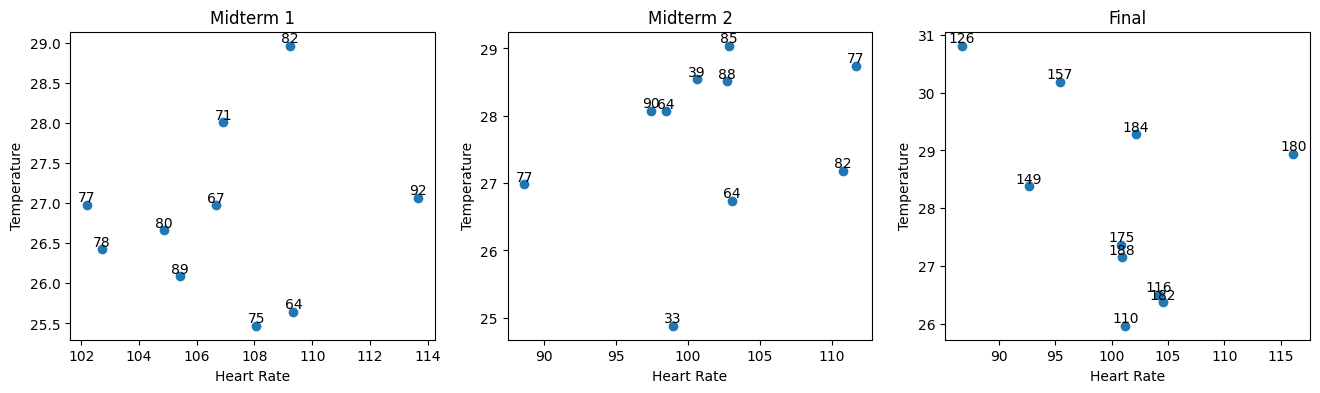

In [ ]:
#Grades of student compared to Heart rate and Temperature
fig = plt.figure(figsize=(16, 4))

grades = {
"Midterm 1": [78,82,77,75,67,71,64,92,80,89],
"Midterm 2": [82,85,90,77,77,64,33,88,39,64],
"Final": [182,180,188,149,157,175,110,184,126,116]
}

count=1

for grade_key,grade_value in grades.items():
  Avg_HR=[]
  Avg_Temp=[]
  for df_name,df in dict_of_df.items():
    Avg_Temp.append(df.loc[df['ExamType']==grade_key]['temp'].mean())
    Avg_HR.append(df.loc[df['ExamType']==grade_key]['hr'].mean())
  # plotting
  plt.subplot(1, 3, count)
  plt.scatter(Avg_HR,Avg_Temp)
  # putting grades on each point
  for (xi, yi, grade) in zip(Avg_HR,Avg_Temp,grade_value):
    plt.text(xi, yi, grade, va='bottom', ha='center')
  plt.xlabel('Heart Rate')
  plt.ylabel('Temperature')
  plt.title(grade_key)
  count+=1

plt.show()

####Key findings
-Student with relatively low/Avg heart rate and high temperatures performed better in exam.

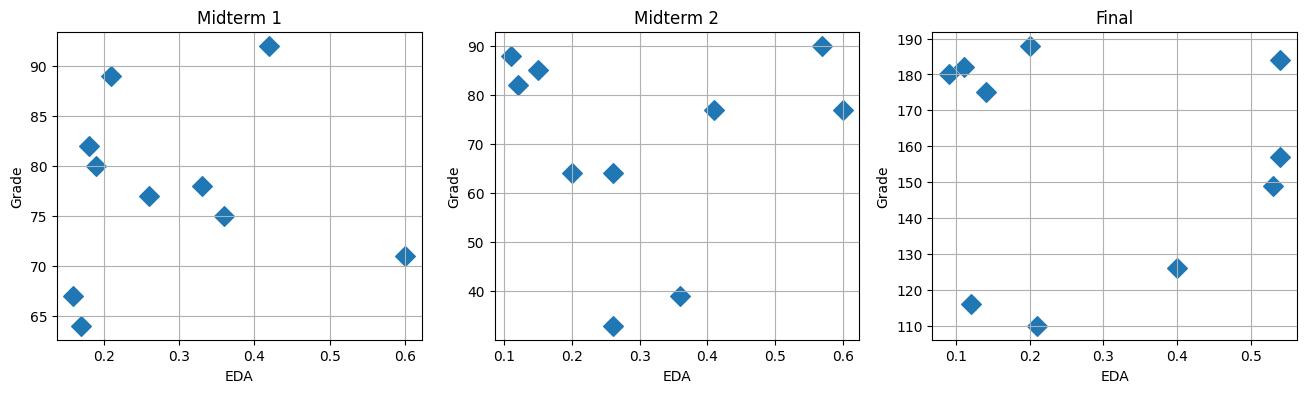

In [ ]:
#Grades of student compared to EDA sensor data
fig = plt.figure(figsize=(16, 4))
count=1
for grade_key,grade_value in grades.items():
  AVG_EDA=[]
  for df_name,df in dict_of_df.items():
    AVG_EDA.append(df.loc[df['ExamType']==grade_key]['eda'].mean().round(2))
  plt.subplot(1, 3, count)
  plt.scatter(AVG_EDA,grade_value, marker='D',s=100)
  plt.xlabel('EDA')
  plt.ylabel('Grade')
  plt.title(grade_key)
  plt.grid()
  count+=1

####Key findings
-Student with low stress performed better in exam.

###There is lot more that can be analysed with this data.
---

